## Problem: Predicting Usage of a Video Game Research Server

## 1. Data Description

The datasets originate from a research Minecraft server and contain anonymized player-level and session-level data.

---

### 📌 **players.csv**
**• Observations:** 196  
**• Variables:** 7  
**• ID field:** hashedEmail  
**• Summary:**  
Contains player-level demographic and gameplay information, such as experience tier, subscription status, gender, age, and total hours played.

---

### 🎮 **sessions.csv**
**• Observations:** 1,535  
**• Variables:** 5  
**• ID field:** hashedEmail  
**• Summary:**  
Contains session-level logs including session start and end times. Each player may have multiple sessions.

---


## （1)Variable Summary

                                                       players.csv Variable   
| Variable         | Type        | Description                                              |
| ---------------- | ----------- | -------------------------------------------------------- |
| experience  | Categorical | Player experience category (e.g., Pro, Veteran, Amateur) |
| subscribe   | Boolean     | Indicates whether the player subscribed to the server    |
| hashedEmail  | String      | Unique anonymized identifier for each player             |
| played_hours| Numeric     | Total number of hours the player has spent on the server |
| name| Strin
g      | Player’s username                                        |
|gender   | Categorical | Gender of the player (Male/Female)                       |
| Age | Numeric     | Age of the player                                        |


                                                      sessions.csv variables
| Variable                | Type              | Description                                     |
| ----------------------- | ----------------- | ----------------------------------------------- |
| **hashedEmail**         | String            | Player identifier matching players.csv          |
| **start_time**          | String (Datetime) | Session start time in "DD/MM/YYYY HH:MM" format |
| **end_time**            | String (Datetime) | Session end time                                |
| **original_start_time** | Numeric           | UNIX timestamp of session start                 |
| **original_end_time**   | Numeric           | UNIX timestamp of session end                   |


## （2)Summary Statistics (Rounded to 2 Decimal Places)

                                                            players.csv
| Variable         | Mean  | Std Dev | Min | Max  |
| ---------------- | ----- | ------- | --- | ---- |
| **played_hours** | 4.16  | 7.46    | 0.0 | 51.3 |
| **Age**          | 18.45 | 6.06    | 7   | 47   |


                                                          sessions.csv
| Variable                | Mean       | Std Dev | Min        | Max        |
| ----------------------- | ---------- | ------- | ---------- | ---------- |
| **original_start_time** | 1.71920e12 | 3.56e09 | 1.71240e12 | 1.72733e12 |
| **original_end_time**   | 1.71920e12 | 3.55e09 | 1.71240e12 | 1.72734e12 |


### （3)Potential Issues in the Data**

- **Missing or inconsistent values**  
  - Some players have 0 recorded play hours despite appearing in the dataset.  
  - The Age variable includes values as low as 7, which may not reflect typical users.

- **Inconsistent time formats**  
  - Timestamps appear both as human-readable strings and UNIX values.  
  - Session durations must be calculated after converting all formats consistently.

- **Repeated players in the sessions dataset**  
  - Players often have multiple sessions, requiring aggregation for player-level analysis.

- **Potential short or incomplete sessions**  
  - Some sessions appear extremely short, likely due to disconnects or login errors.

- **Unbalanced experience categories**  
  - Experience groups are not evenly distributed (e.g., “Amateur” is the most common), which may bias modeling.

---

### **(4)Data Collection Method**

The datasets were generated automatically by a research Minecraft server.

- Player demographic information (experience level, subscription status, age, gender) was collected during user registration.  
- Session data (login and logout times) were recorded each time a player connected or disconnected from the server.  
- All email addresses were hashed using secure hashing techniques to protect user privacy while preserving the ability to link sessions and player profiles.

---


## 2. Questions：

### **Broad Question**
What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various types of players?

### **Specific Predictive Question**
Can demographic variables (such as age and gender), experience-related attributes (such as experience level and total hours played), and gameplay behaviour (such as number of sessions, average session duration, or consistency of play) predict whether a player subscribes to the newsletter in the combined players.csv and sessions.csv datasets?

### **How the Data Will Help Address This Question**
The `subscribe` variable in players.csv provides a clear binary response variable indicating whether each player opted into the newsletter. A wide range of explanatory variables can be derived from the two datasets:

- **Player demographics:** age, gender  
- **Experience indicators:** experience category, total played hours  
- **Behavioural features extracted from sessions.csv:**  
  - number of sessions  
  - total session time  
  - average session length  
  - time-of-day play patterns  
  - player activity consistency  

By merging players.csv with aggregated session-level data, we can construct a unified dataset containing both player characteristics and behavioural metrics. After wrangling the timestamps into usable numerical features, we can apply predictive methods covered in class—such as logistic regression, K-nearest neighbours, or decision trees—to evaluate which variables are most informative for predicting newsletter subscription.  
This analysis will also allow us to compare how these predictive features vary across different types of players (e.g., Amateur, Pro, Veteran).


In [46]:
library(repr)
library(tidyverse)
source("cleanup.R")
options(repr.matrix.max.rows = 6) #limits output of dataframes to 6 rows

Warning message in file(filename, "r", encoding = encoding):
“cannot open file 'cleanup.R': No such file or directory”


ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


In [47]:
players <- read_csv("players.csv")
sessions <- read_csv("sessions.csv")
head(players)
head(sessions)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


In [48]:
players <- players |>
  mutate(
    experience   = factor(experience),
    gender       = factor(gender),
    subscribe    = factor(subscribe),
    played_hours = as.numeric(played_hours),
    Age          = as.numeric(Age))
sessions <- sessions |>
  mutate(
    start_time          = as.character(start_time),
    end_time            = as.character(end_time),
    original_start_time = as.numeric(original_start_time),
    original_end_time   = as.numeric(original_end_time))

sessions_tidy <- sessions |>
  group_by(hashedEmail) |>
  summarize(session_count = n(), .groups = "drop")

player_full <- players |>
  left_join(sessions_tidy, by = "hashedEmail")

head(player_full)
head(sessions_tidy)

experience,subscribe,hashedEmail,played_hours,name,gender,Age,session_count
<fct>,<fct>,<chr>,<dbl>,<chr>,<fct>,<dbl>,<int>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,27
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,3
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,1
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,1
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,1
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17,NA


hashedEmail,session_count
<chr>,<int>
0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832,2
060aca80f8cfbf1c91553a72f4d5ec8034764b05ab59fe8e1cf0eee9a7b67967,1
0ce7bfa910d47fc91f21a7b3acd8f33bde6db57912ce0290fa0437ce0b97f387,1
0d4d71be33e2bc7266ee4983002bd930f69d304288a8663529c875f40f1750f3,13
0d70dd9cac34d646c810b1846fe6a85b9e288a76f5dcab9c1ff1a0e7ca200b3a,2
11006065e9412650e99eea4a4aaaf0399bc338006f85e80cc82d18b49f0e2aa4,1


In [49]:
players_means <- players %>%
  summarise(mean_played_hours = mean(played_hours, na.rm = TRUE), mean_age = mean(Age, na.rm = TRUE))
players_means


mean_played_hours,mean_age
<dbl>,<dbl>
5.845918,21.13918


Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


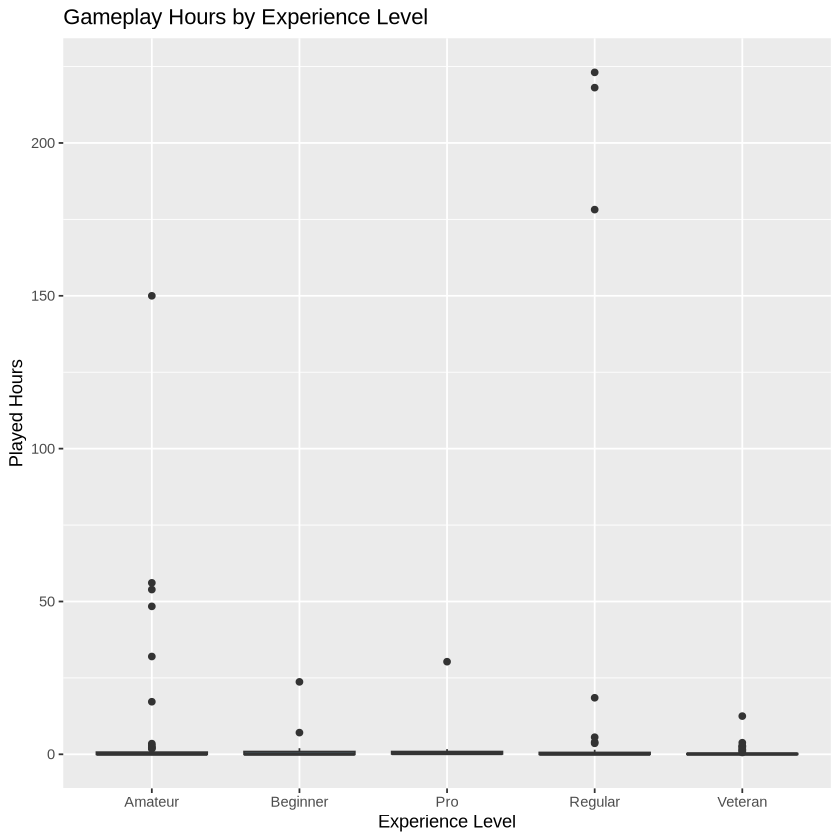

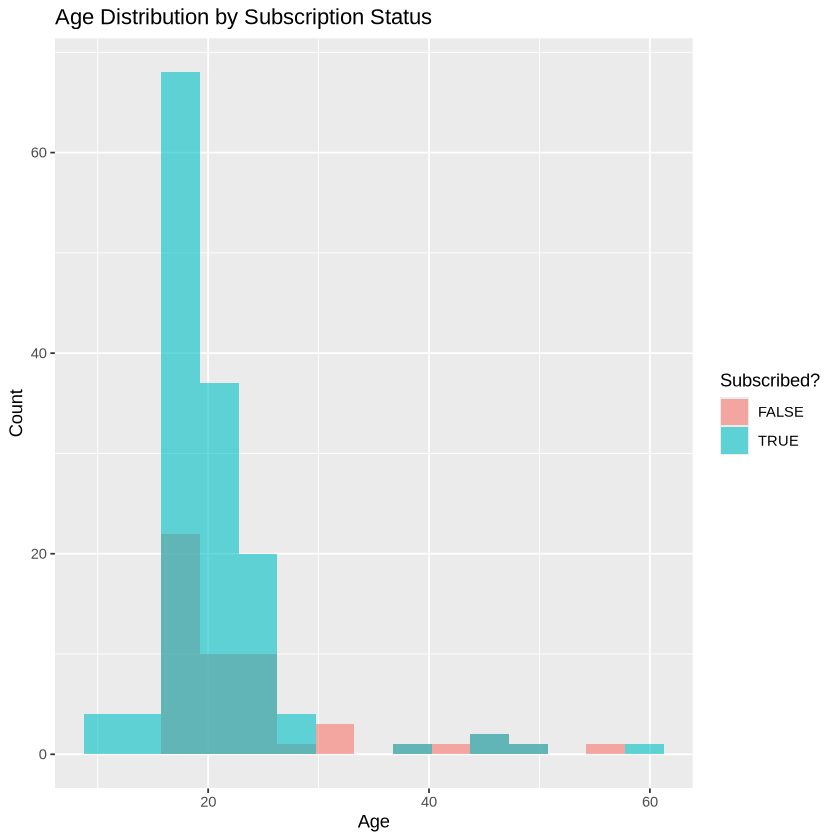

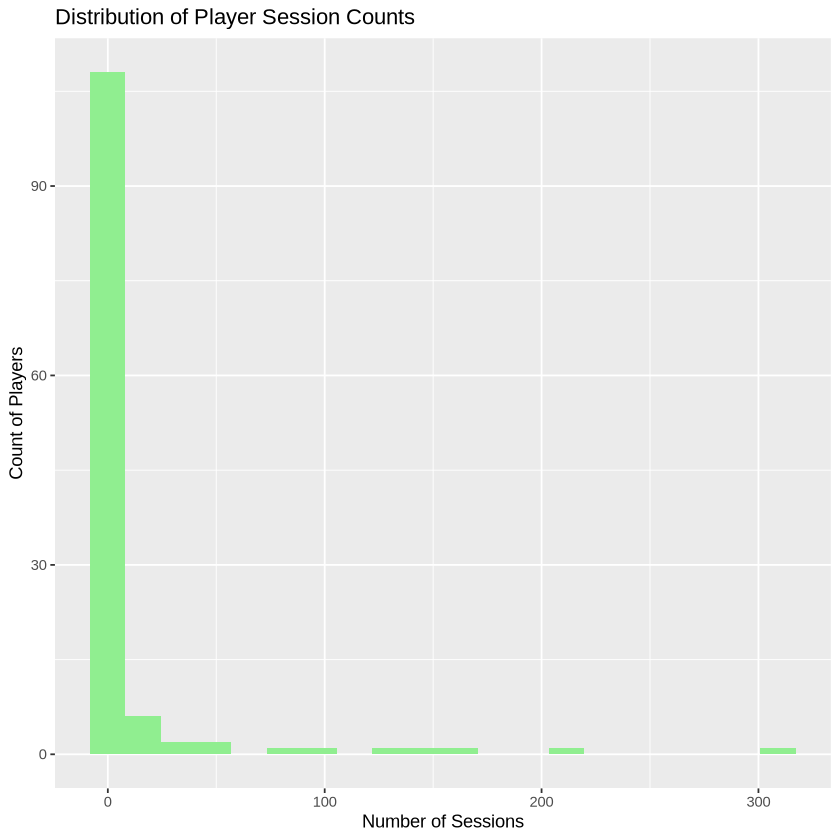

In [50]:
ggplot(players, aes(x = experience, y = played_hours)) +
  geom_boxplot(fill = "skyblue") +
  labs(
    title = "Gameplay Hours by Experience Level",
    x = "Experience Level",
    y = "Played Hours")


ggplot(players, aes(x = Age, fill = subscribe)) +
  geom_histogram(position = "identity", alpha = 0.6, bins = 15) +
  labs(
    title = "Age Distribution by Subscription Status",
    x = "Age",
    y = "Count",
    fill = "Subscribed?")

sessions_tidy <- sessions |>
  group_by(hashedEmail) |>
  summarise(session_count = n())

ggplot(sessions_tidy, aes(x = session_count)) +
  geom_histogram(fill = "lightgreen", bins = 20) +
  labs(
    title = "Distribution of Player Session Counts",
    x = "Number of Sessions",
    y = "Count of Players")



## (4) Methods and Plan

To study which player characteristics and behaviours are related with
subscribing to the game newsletter, I plan to use **logistic regression**.
The response variable `subscribe` is binary (yes/no), and logistic regression
is a standard and quite interpretable method for this kind of outcome.

**Why this method?**  
It directly model the probability of subscribing and let me see how predictors
such as age, experience level, total hours played, and number of sessions
change the odds of subscription. This help with both prediction and also
understanding *why* some players are more likely to subscribe.

**Key assumptions.**  
I will assume that players are independent from each other, that continuous
predictors have a roughly linear relationship with the log-odds of subscribing,
and that there is no very strong multicollinearity between the predictors.

**Limitations.**  
Logistic regression maybe miss highly non-linear patterns or more complex
interactions, and performance can be affected if the classes (subscribe vs
not subscribe) are very unbalanced.

**Model comparison and data processing.**  
I will split the data into a **training set (about 70%)** and a **test set
(about 30%)** after basic cleaning and feature creation. The model will be
fitted on the training set and then tested on the test set using accuracy,
precision, recall, and maybe AUC. If needed, I will also use
**k-fold cross-validation** on the training set to get a more stable estimate
of how well the model works.
